In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('Projekt II - outband SE.xlsx')
df.head()


,Stop Cons.,distance,Total freight cost EUR,Total gross kg,Volume m3,Collection,Disp. dt.,Csee,City,Posta Code,CntryD,Type of transport,Forwarder,Incoterms
0,False,9983.0,156.606,40.0,12,DC Trosa,2021-01-25,AB Singapore Pte Ltd,SINGAPORE,498801,SG,air,DHL,DAP
1,False,9983.0,535.000,14.7,21,DC Trosa,2021-01-21,AB Singapore Pte Ltd,SINGAPORE,408934,SG,air,Geodis,DAP
2,False,9983.0,423.476,99.0,341,DC Trosa,2021-01-21,AB Singapore Pte Ltd,Singapore,408934,SG,air,DHL,DAP
3,False,9983.0,63.461,2.2,34,DC Trosa,2021-01-19,AB Singapore Pte Ltd,SINGAPORE,629043,SG,air,DHL,DAP
4,False,9983.0,164.937,44.0,324,DC Trosa,2021-01-19,AB Singapore Pte Ltd,SINGAPORE,627608,SG,air,DHL,DAP


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Stop Cons.              5247 non-null   bool          
 1   distance                5247 non-null   float64       
 2   Total freight cost EUR  5247 non-null   float64       
 3   Total gross kg          5247 non-null   float64       
 4   Volume m3               5247 non-null   object        
 5   Collection              5247 non-null   object        
 6   Disp. dt.               5247 non-null   datetime64[ns]
 7   Csee                    5247 non-null   object        
 8   City                    5247 non-null   object        
 9   Posta Code              5247 non-null   object        
 10  CntryD                  5247 non-null   object        
 11  Type of transport       5247 non-null   object        
 12  Forwarder               5247 non-null   object  

In [8]:
df.describe()

,distance,Total freight cost EUR,Total gross kg,Disp. dt.
count,5247.000000,5247.000000,5247.000000,5247
mean,5966.949014,410.860123,180.819784,2019-12-27 11:43:23.773584896
min,995.000000,1.650000,0.050000,2018-10-22 00:00:00
25%,1667.000000,21.420000,0.900000,2019-06-14 00:00:00
50%,6812.000000,72.597000,6.140000,2020-01-07 00:00:00
75%,7639.500000,413.770500,88.500000,2020-07-22 00:00:00
max,23442.616000,8872.500000,26988.100000,2021-01-27 00:00:00
std,3986.360339,795.795752,666.967147,NaN


In [9]:
df['City'].value_counts()

City
GREENWOOD, IN      2258
Wieliczka          1676
KUNSHAN             657
SINGAPORE           317
Singapore           195
EXTON,PA            118
NEW AUGUSTA, MS      21
PUNE                  4
singapore             1
Name: count, dtype: int64

In [13]:
df['City']=df['City'].str.upper()

In [14]:
df['City'].value_counts()

City
GREENWOOD, IN      2258
WIELICZKA          1676
KUNSHAN             657
SINGAPORE           513
EXTON,PA            118
NEW AUGUSTA, MS      21
PUNE                  4
Name: count, dtype: int64

In [20]:
df.groupby(['City', 'distance'])['Stop Cons.'].agg('count')

City             distance 
EXTON,PA         6812.000      118
GREENWOOD, IN    6812.000     1984
                 7639.500      274
KUNSHAN          7548.000       17
                 8123.000      430
                 10448.000     101
                 23442.616     109
NEW AUGUSTA, MS  6812.000       21
PUNE             6619.000        3
                 14291.884       1
SINGAPORE        9983.000      511
                 18310.724       2
WIELICZKA        995.000       661
                 1667.000     1015
Name: Stop Cons., dtype: int64

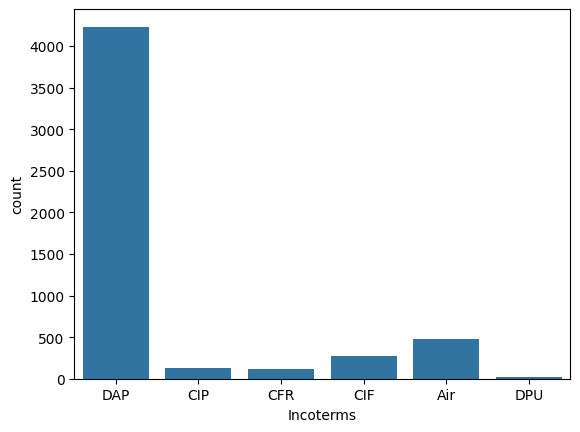

In [25]:
sns.countplot(data=df, x='Incoterms')
plt.show()

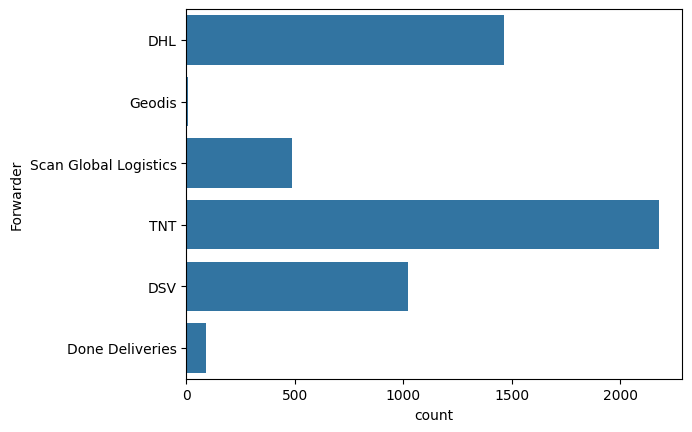

In [22]:
sns.countplot(data=df, y='Forwarder')
plt.show()

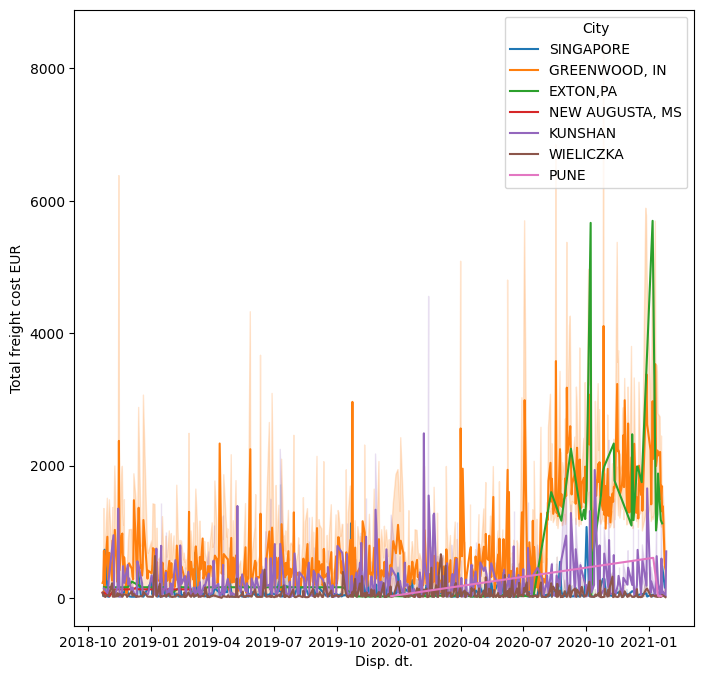

In [26]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df, x='Disp. dt.', y='Total freight cost EUR', hue='City')
plt.show()

In [27]:
df.sort_values('Disp. dt.', inplace=True)

In [31]:
df['Disp. dt.'].value_counts().sort_index()

Disp. dt.
2018-10-22     7
2018-10-23     4
2018-10-24    14
2018-10-25     4
2018-10-26     6
              ..
2021-01-21    12
2021-01-22     6
2021-01-25     7
2021-01-26     4
2021-01-27     1
Name: count, Length: 566, dtype: int64

In [36]:
dow = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}
df['dow'] = df['Disp. dt.'].dt.dayofweek.map(dow)
df.head()

,Stop Cons.,distance,Total freight cost EUR,Total gross kg,Volume m3,Collection,Disp. dt.,Csee,City,Posta Code,CntryD,Type of transport,Forwarder,Incoterms,dow
5242,False,995.0,16.974,1.30,45,DC Trosa,2018-10-22,AB Wieliczka SP. Z.O.O.,WIELICZKA,30-390,PL,air,DHL,DAP,Monday
5241,False,995.0,135.212,74.00,5,DC Trosa,2018-10-22,AB Wieliczka SP. Z.O.O.,WIELICZKA,30-390,PL,air,DHL,DAP,Monday
2909,False,6812.0,128.000,0.20,34,DC Trosa,2018-10-22,AB NEW AUGUSTA AMDC,"NEW AUGUSTA, MS",46268,US,air,DSV,DAP,Monday
2908,False,6812.0,461.340,198.00,90,DC Trosa,2018-10-22,AB Greenwood AMDC,"GREENWOOD, IN",46268,US,air,DSV,DAP,Monday
2907,False,6812.0,128.000,4.55,9,DC Trosa,2018-10-22,AB Greenwood AMDC,"GREENWOOD, IN",46268,US,air,DSV,DAP,Monday


In [37]:
df['dow'].value_counts()

dow
Wednesday    1886
Monday       1012
Tuesday       801
Thursday      781
Friday        766
Saturday        1
Name: count, dtype: int64

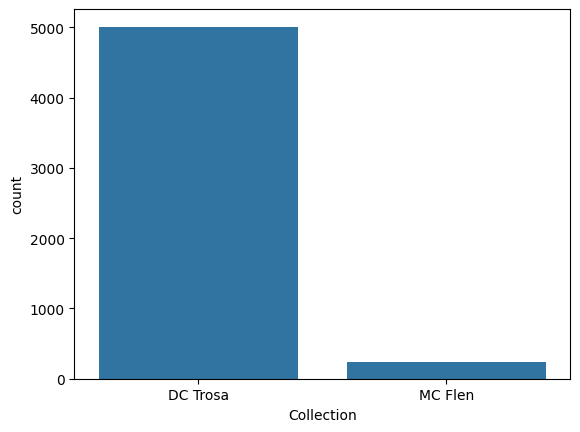

In [38]:
sns.countplot(data=df, x='Collection')
plt.show()

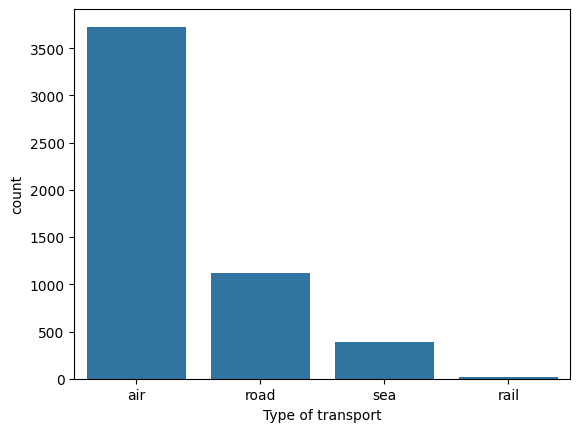

In [40]:
sns.countplot(data=df, x='Type of transport')
plt.show()

In [ ]:
sns.countplot(data=df, y='Forwarder')
plt.show()